In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#step2 importing amazon alexa
df_reviews=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [4]:
df_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df_reviews.shape

(3150, 5)

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df_reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df_reviews['date']=pd.to_datetime(df_reviews['date'])

In [10]:
# display year
df_reviews['date'].dt.year.value_counts()

2018    3150
Name: date, dtype: int64

In [11]:
df_reviews['date'].min()

Timestamp('2018-05-16 00:00:00')

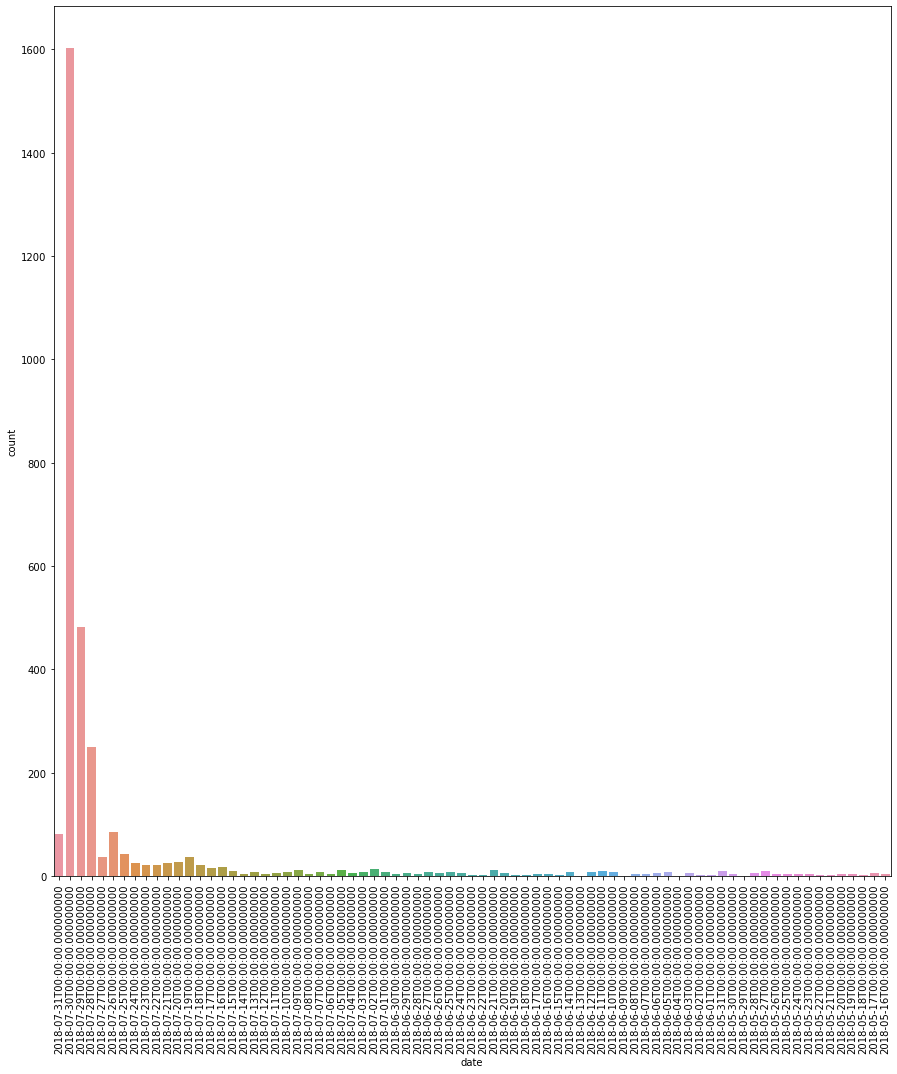

In [12]:
plt.figure(figsize=(15,16))
sns.countplot(x='date',data=df_reviews)
plt.xticks(rotation=90)
plt.show();

C:\Users\sreem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='count'>

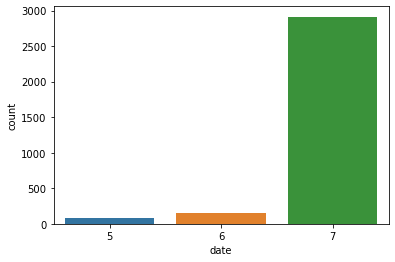

In [13]:
sns.countplot(df_reviews['date'].dt.month)

In [15]:
df_reviews['date'].dt.month.value_counts()

7    2913
6     155
5      82
Name: date, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

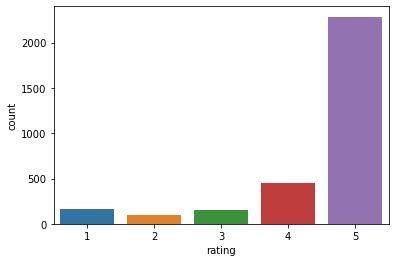

In [16]:
sns.countplot(x='rating',data=df_reviews)

In [18]:
df_reviews.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

<AxesSubplot:xlabel='feedback', ylabel='count'>

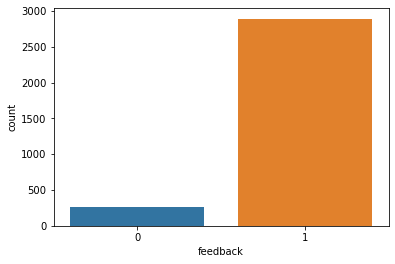

In [20]:
sns.countplot(x='feedback',data=df_reviews)

count    3150.000000
mean       25.293016
std        34.584971
min         0.000000
25%         6.000000
50%        14.000000
75%        32.000000
max       526.000000
Name: length, dtype: float64

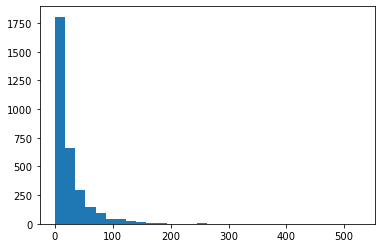

In [22]:
df_reviews['length']=df_reviews['verified_reviews'].apply(lambda x:len(x.split()))
df_reviews.head()
plt.hist(x='length',data=df_reviews,bins=30)
df_reviews.length.describe()

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


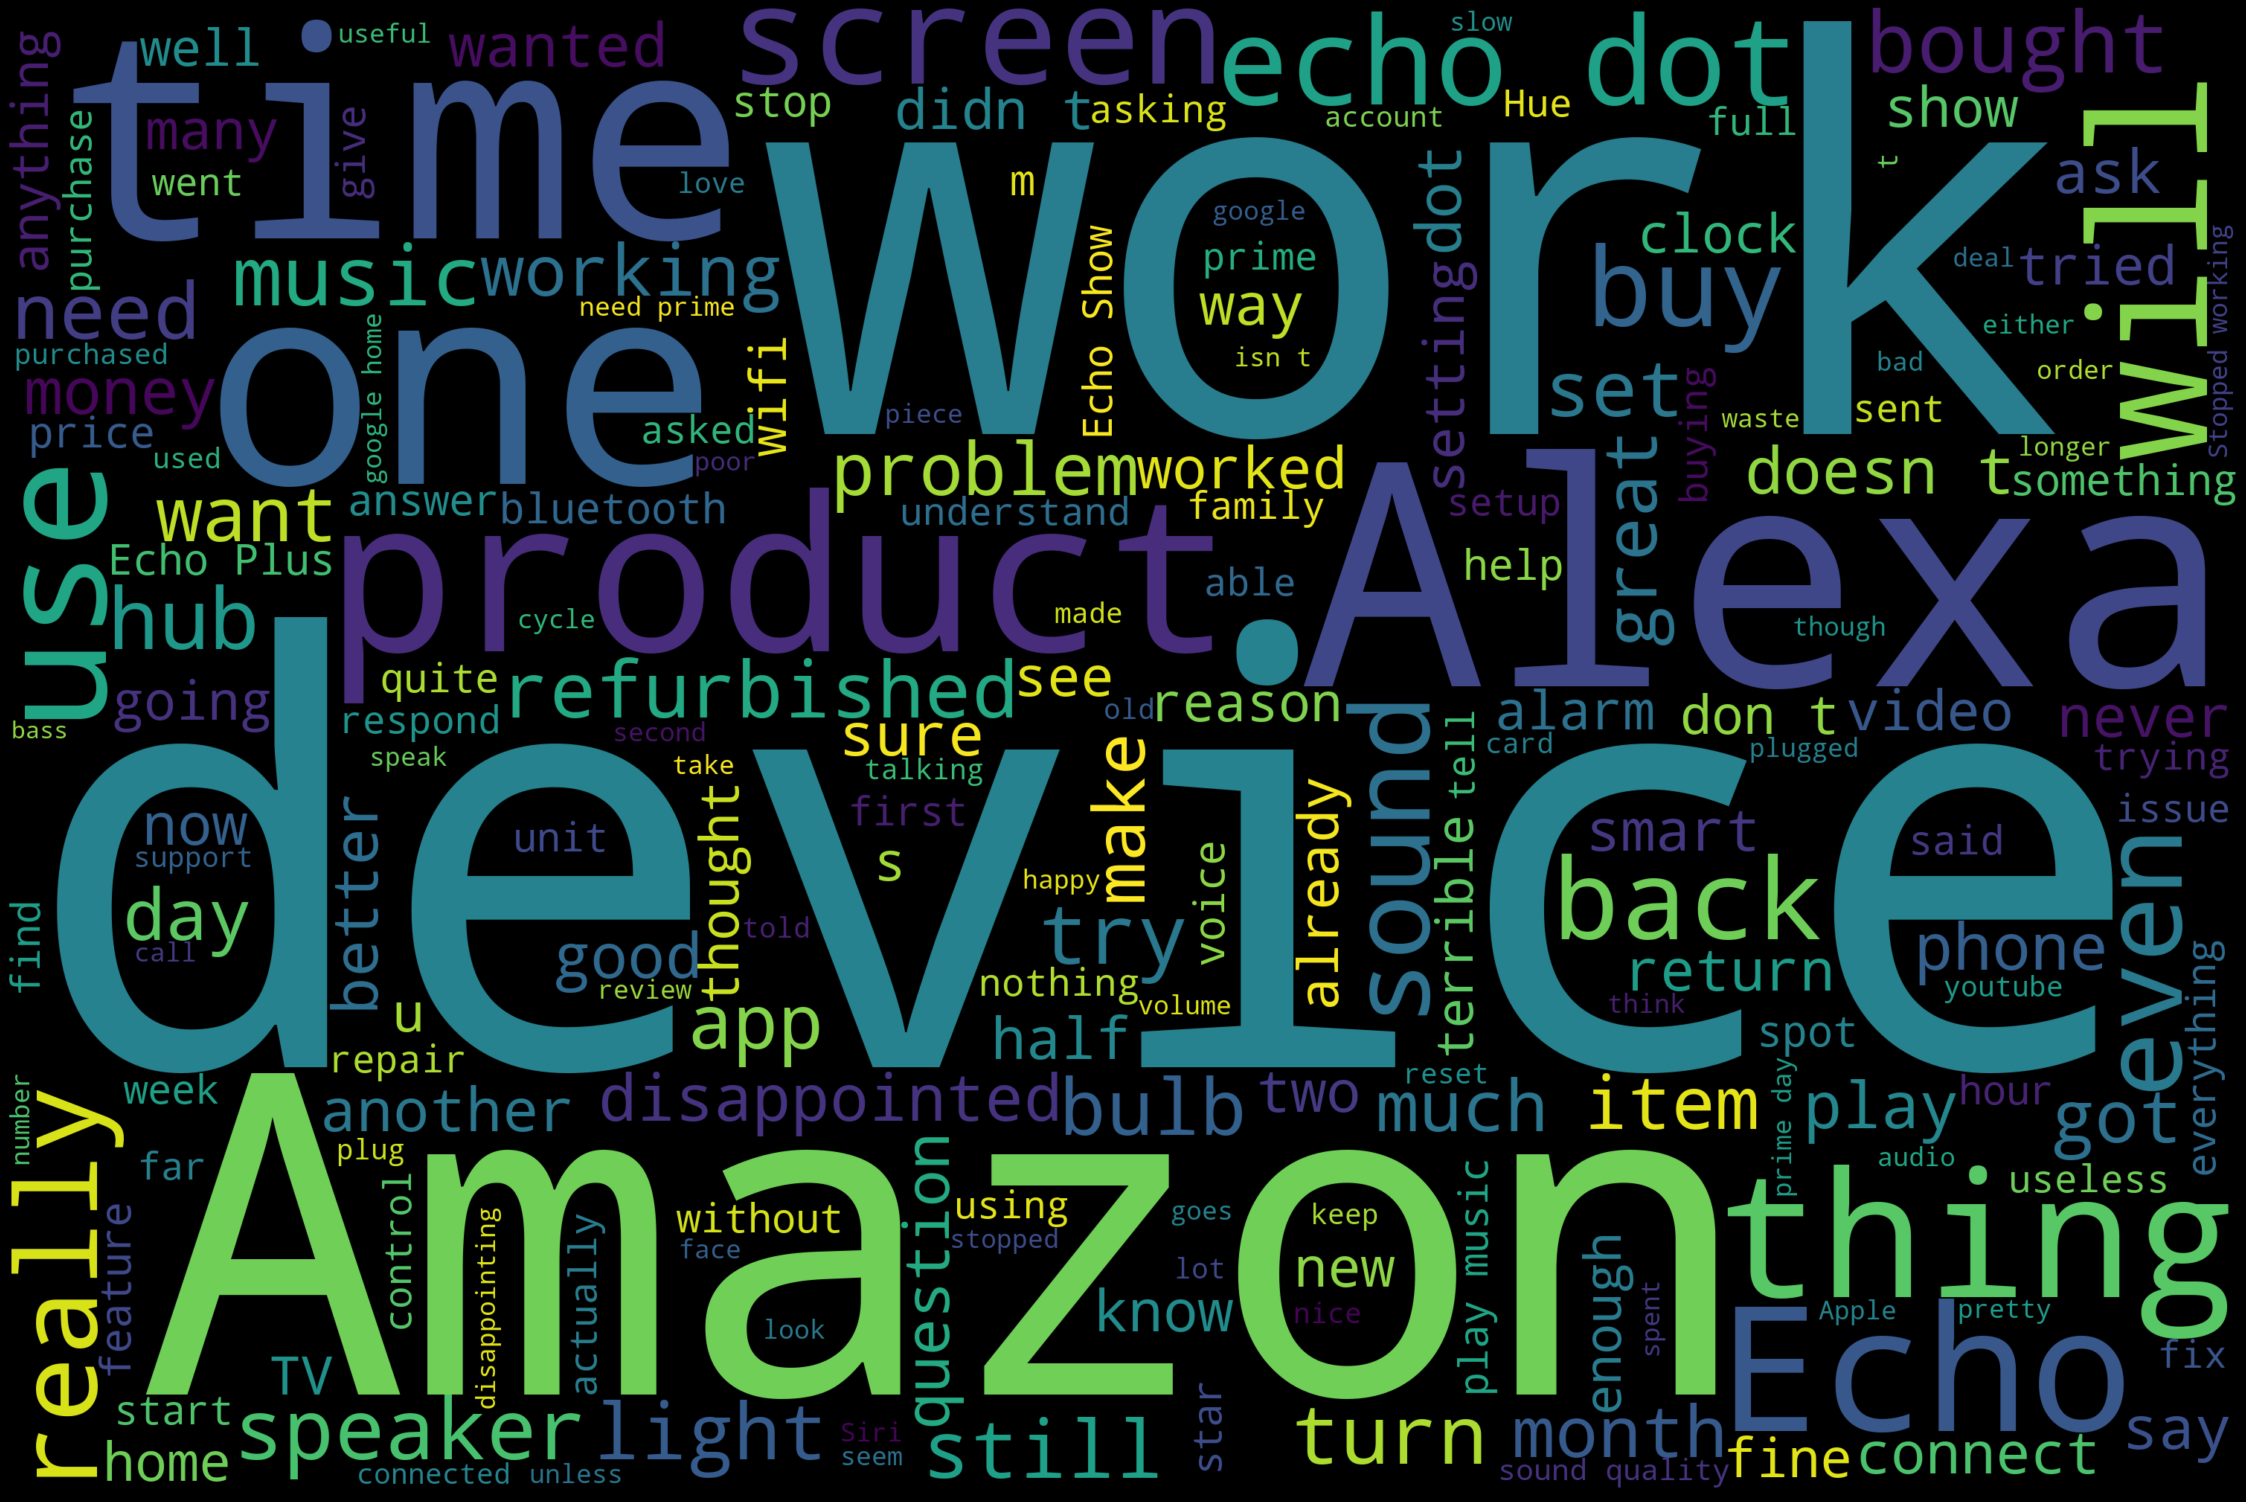

In [35]:
#generating wordcloud
neg=df_reviews[df_reviews['feedback']==0]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text =neg['verified_reviews'].values
wordcloud=WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=STOPWORDS).generate(str(text))
fig=plt.figure(
    figsize=(40,30),
    facecolor='k',
    edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tick_params(axis='both',labelsize=14)
plt.show()

<AxesSubplot:>

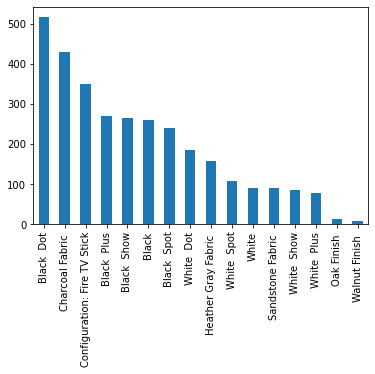

In [36]:
df_reviews['variation'].value_counts().plot.bar()

In [37]:
df_reviews['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

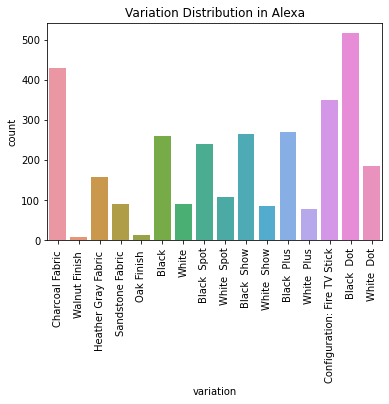

In [38]:
sns.countplot(x='variation',data=df_reviews)
plt.title('Variation Distribution in Alexa')
plt.xlabel('variation')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show